### Variable


## Interactive Scala: The REPL
One of the advantages of Scala is its Read, Eval, Print Loop (REPL) that let's you play with the language in an interactive manner.
The de facto build tool for Scala is called SBT (Simple Build Tool) that provides its own REPL and has lots of functionalities. While in SBT, you can start its REPL with console command.
You can also use the Worksheet feature of IDE's like Intellij IDEA and Eclipse. NetBeans offers the same functionality by the name of Interactive Console.
Notebooks let you play with Scala in a similiar fashion to a REPL. For this tutorial, we will be using a Databricks Notebook that has a free, community edition suitable for learning Scala and Spark (and it's sanction-free!).
Remember, using the REPL is a very fun, easy, and effective way to get yourself familiar with Scala features and syntax.

### Defining Variables
Use val keyword to define immutable variables. We can't change what a val points to, but if the object itself is mutable, we can change it.
Use var keyword to define mutable variables.
Variables defined using val and var must be initialized immediately.
Functional Programming encourages us to use immutable variables whenever possible. Mutable variables are common sources of bugs, and actually you can't use them that much in distributed programs, such as the ones we run using Spark.
Let's define a variable called workshopTitle and assign it a String, "Introduction to Scala Programming":

In [46]:
val workshopTitle = "Introduction to Scala Programming"


workshopTitle: String = Introduction to Scala Programming


In [48]:
println(workshopTitle)

Introduction to Scala Programming


In [49]:
workshopTitle = "Stream Processing and Machine Learning with Spark"

<console>: 24: error: reassignment to val

### Type Inference
As you may have noticed, we didn't explicitly defined the type of workshopTitle. Type information is often inferred in Scala. This let's us write codes faster, but caution should be taken when you are not sure about the type Scala is going to infer about your variable.
We could have explicitly defined workshopTitle as a String:
val workshopTitle: String = "Introduction to Scala Programming"

### Semicolons and Comments
You don't need to place a semicolon at the end of the lines.
Scala follows the same commenting conventions of Java.

### If clause
Scala if clauses are like Java's. The difference, however, is that every if statement is actually an expression that returns value, so we can assign the result to a variable.
Consider this example:

In [5]:
val configFile = new java.io.File("SomeFile.txt")

val configPath = if(configFile.exists()){
  configFile.getAbsolutePath()
} else{
  configFile.createNewFile()
  configFile.getAbsolutePath()
}

configFile: java.io.File = SomeFile.txt
configPath: String = G:\My Drive\learn_all\DEV_practice\SomeFile.txt


### For-Comprehensions
In Scala, for control structure is very feature rich. Let's explore it through a number of examples.
We'll start by a basic for expression:

In [6]:
val weekDays = List("Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday")
for(day <- weekDays)
  println(day)



Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday


weekDays: List[String] = List(Saturday, Sunday, Monday, Tuesday, Wednesday, Thursday, Friday)


So we iterated through the list of weekdays and for each element (each weekday), we created a temporary variable called day with the value of the element, and printed it.
The day <- weekDays expression is called a generator expression. The <- (left arrow) operator is used to iterate through collections.
We can also leverage Range to quickly write a for loop:

In [7]:
for (i <- 1 to 10) println(i)

1
2
3
4
5
6
7
8
9
10


### Guards
We can add if expressions to filter for the elements we want to keep. These expressions are called guards.
Let's filter for just the days that start with "S", and notice the difference in syntax:

In [8]:
for(day <- weekDays
  if day.startsWith("S"))
println(day)

Saturday
Sunday


In [9]:
for{ day <- weekDays
  if day.startsWith("S")
}{
  println(day)
}

Saturday
Sunday


### Yielding
The yield keyword is used to generate new collections with for expressions:

In [10]:
val filteredDays = for{
  day <- weekDays
  if day.startsWith("S")
}yield day

filteredDays.foreach(println)

Saturday
Sunday


filteredDays: List[String] = List(Saturday, Sunday)


Note that if you do not specify the type of the yielded collection, it is inferred from the type of the original collection being iterated over.

### Method Definition
Method definitions begin with the def keyword, followed by an optional list of arguments. After that, you can place an optional return type. If you don't provide the return type, it will be inferred. After that, a = acts as the separator between method signature and method body.
Let's define a method that takes a variable-length list of strings and returns the upper-cased version of the input list:

In [11]:
def upper(strings: String*): Seq[String] = {
  strings.map((s: String) => s.toUpperCase())
}

upper: (strings: String*)Seq[String]


In [12]:
upper("First String", "Second String").foreach(println)

FIRST STRING
SECOND STRING


In Scala, the last expression in a function or method is the return value.
However, Scala contains return keyword for interoperability with Java, but it is rarely used in methods.
If a method takes no parameters, you can define it without parantheses. However, the convention is to omit parantheses for no-argument methods that have no side effects (for example, a method that returns the size of a collection) and add empty parantheses if side effects (e.g. I/O) are performed, as a caution to the user.

### A Note on Method Return Type Inferrence
Although you can leave out the return type specification, the best practice is to always define the return type explicitly. Explicit return types express what you expect the method to return. This is specially important when writing public APIs.

### Anonymous Functions
We could achieve the same functionality of the upper method with just defined, without explicitly defining a method, and using what is called an anonymous function:

In [13]:
val listOfStrings: List[String] = List("First", "Second", "Third", "Fourth") // we could also just write:   val listOfStrings = List("First","Second,"Third","Fourth")

listOfStrings.map(s => s.toUpperCase()).foreach(println)

FIRST
SECOND
THIRD
FOURTH


listOfStrings: List[String] = List(First, Second, Third, Fourth)


In [14]:
listOfStrings.map(_.toUpperCase)


res7: List[String] = List(FIRST, SECOND, THIRD, FOURTH)


### Higher-Order Functions
When a function accepts other functions as arguments or returns functions as values, it is called a higher-order function (HOF).

### Tuples
Ever wanted to return more than one value from a method? Scala provides a concise and powerful data structure for this purpose, called TupleN (N can be between 1 and 22).

In [15]:
val t2: Tuple2[String, String] = ("One", "Two") 

println("First is: " + t2._1)
println("Second is: " + t2._2)

First is: One
Second is: Two


t2: (String, String) = (One,Two)


In [16]:
val t3 = ("This", "is", "third")
println(t3)

(This,is,third)


t3: (String, String, String) = (This,is,third)


In [17]:
val t4 = Tuple4("This", "is", "Tuple", 4)
println(t4)

(This,is,Tuple,4)


t4: (String, String, String, Int) = (This,is,Tuple,4)


### Classes
In Scala, a class definition begins with the class keyword and the body is placed inside the outermost curly braces {}.

In [19]:
class Upper{
  def upper(strings: String*): Seq[String] = {
    strings.map((s: String) => s.toUpperCase())
  }
}
val up = new Upper
println(up.upper("Scala", "is", "cool!")) // print the actual list


ArrayBuffer(SCALA, IS, COOL!)


defined class Upper
up: Upper = Upper@64bf3c80


In [20]:
class Person(val name: String, var age: Int = 12)

defined class Person


In [21]:
val p = new Person("Sina", 24)

println(p.name)
println(p.age)

Sina
24


p: Person = Person@47e957b3


In [22]:
p.age = 25
println(p.age)

25


p.age: Int = 25


### Objects
Take a look at this block of code:

In [23]:
object UpperObject{
  def upper(strings: String*) = strings.map(_.toUpperCase())
}
println(UpperObject.upper("Scala", "is", "cool!"))

ArrayBuffer(SCALA, IS, COOL!)


defined object UpperObject


When we declare something with the object keyword, it will be considered a singleton (Remember the Singleton Design Pattern?). We are declaring a class, but the Scala runtime will only create one instance of it, thus we cannot write new Upper.
Also, in Scala, the main method must be placed inside an object. (In Java, main must be a static method in a class.)

### Pattern Matching
Pattern matching is a powerful feature of Scala, and can be used for decomposing data structures. It can also be used for exception handling.

In [24]:
val bools = Seq(true, false)

for(bool <- bools){
  bool match{
    case true => println("It's true")
    case false => println("It's false")
  }
}

It's true
It's false


bools: Seq[Boolean] = List(true, false)


In [25]:
val sequence = Seq(1, 2, 2.7, "one", "two", 'four)
for(x <- sequence)
{ val str = x match {
    case 1 => "int 1"
    case i: Int => "other int: "+i
    case d: Double => "a double: "+d
    case "one" => "string one"
    case s: String => "other string: "+s
    case unexpected => "unexpected value: "+unexpected
  }
  println(str)
 }

int 1
other int: 2
a double: 2.7
string one
other string: two
unexpected value: 'four


sequence: Seq[Any] = List(1, 2, 2.7, one, two, 'four)


### Partial Functions
A Partial Function consists only of case clauses, and the entire body must be enclosed in braces.
When one of the patterns matches, the expressions after the => up to the next case keyword (or, the end of function) are evaluated.
If the function is called with an input that doesn't match one of the case clauses, a MathError will be thrown at the runtime.
You can test if a partial function matches its input using isDefinedAt method.
A classic example of a partial function in mathematics is division (x/y) which is undefined when y is 0.

In [26]:
val one: PartialFunction[Int, String] = { case 1 => "one"}
println(one.isDefinedAt(1))
println(one.isDefinedAt(0))

true
false


one: PartialFunction[Int,String] = <function1>


In [27]:
val two: PartialFunction[Any, String] = {
  case 2 => "literal for two"
  case s: String if (s.length < 5) => "Length is less than 5"
  case s: String => "You entered a string"
  case d: Double => "It's a Double"
  case unexpected => "Unexpected input"
}

two: PartialFunction[Any,String] = <function1>


In [28]:
println(two(2))
println(two("Test"))
println(two("Long String"))
println(two(3.0d))
println(two('a'))

literal for two
Length is less than 5
You entered a string
It's a Double
Unexpected input


You can chain several partial functions together using the following syntax: pf1 orElse pf2 orElse pf3 .... A MathError is only thrown if none of the partial functions match the input.

### Ranges
A Range literal makes it very easy to create sequences of numbers and characters. You can create ranges with an inclusive and exclusive upper bounds and arbitrary intervals. Let's explore this through some examples:

In [29]:
1 to 10

res20: scala.collection.immutable.Range.Inclusive = Range 1 to 10


In [30]:
val range1 = 1 until 10
range1.foreach(println)
range1(0)

1
2
3
4
5
6
7
8
9


range1: scala.collection.immutable.Range = Range 1 until 10
res21: Int = 1


In [31]:
1f to 11f by 3.1f

res22: scala.collection.immutable.NumericRange[Float] = NumericRange 1.0 to 11.0 by 3.1


In [32]:
val x = ('a' to 'g' by 3).toArray

x: Array[Char] = Array(a, d, g)


In [33]:
for (i <- 1 to 3) println(i)

1
2
3


### while and do-while Loops
These loops are somewhat similiar to Java. Let's write a do-while loop that uses a mutable variable and counts up to 10:

In [34]:
var count = 0

do{
  count += 1
  println(count)
} while (count < 10)

1
2
3
4
5
6
7
8
9
10


count: Int = 10


### Collections
Scala defines several collection classes:

### Base Classes
Iterable (collections you can iterate on)
Seq (ordered Sequences)
Set
Map (Lookup Data Structure)
### Immutable Collections
List (linked list, fast sequential access)
Stream (same as List, except that the tail is evaluated only on demand)
Vector (array-like type, implemented as tree of blocks, provides fast random access)
Range (ordered sequence of integers with equal spacing)
String (Java type, implicitly converted to a character sequence, so you can treat every string like a Seq[Char])
Map (collection that maps keys to values)
Set (collection without duplicate elements)
### Mutable Collections
Array (fixed-size sequential collection of elements of the same type)

In [35]:
val m = Map(1 -> "Scala", 2 -> "Spark")
println(m(1))

Scala


m: scala.collection.immutable.Map[Int,String] = Map(1 -> Scala, 2 -> Spark)


### Functional Combinators
The most notables are:

map: Apply a function over each element in the list
flatten: It collapses one level of nested structure
flatMap: It's map + flatten
foreach: It's like map but returns nothing

In [36]:
val numbers = List(1, 2, 3, 4)

numbers: List[Int] = List(1, 2, 3, 4)


In [37]:
numbers.map(i => i*2)

res26: List[Int] = List(2, 4, 6, 8)


In [38]:
List(List(1,2),List(3,4)).flatten

res27: List[Int] = List(1, 2, 3, 4)


### Arrays

In [39]:
val array: Array[String] = new Array(5)

array: Array[String] = Array(null, null, null, null, null)


In [40]:
array(0) = "Hello"

In [41]:
array(4) = "Bye"

In [42]:
array.foreach(println)

Hello
null
null
null
Bye


### Options 

Options are the way Scala deals with the situations where we might have a null value. Scala's Option is an abstract class which has two concrete subclasses:

Some, for when we have a value, and
None, for when we don't have a value - when it's null.
The following example demonstrates everything you'll probably need to know about Options:

In [43]:
val stateCapitals = Map(
  "Alabama" -> "Montgomery",
  "Alaska" -> "Juneau",
  "Wyoming" -> "Cheyenne"
)

stateCapitals: scala.collection.immutable.Map[String,String] = Map(Alabama -> Montgomery, Alaska -> Juneau, Wyoming -> Cheyenne)


In [44]:
println( "Get the capitals wrapped in Options:" )
println( "Alabama: " + stateCapitals.get("Alabama") )
println( "Wyoming: " + stateCapitals.get("Wyoming") )
println( "Unknown: " + stateCapitals.get("Unknown") )

Get the capitals wrapped in Options:
Alabama: Some(Montgomery)
Wyoming: Some(Cheyenne)
Unknown: None


The Map.get method returns an Option[T] (T is String in our case). By returning an Option, we can’t “forget” that we have to verify that something was returned.
As you can see, when we ask for an entry that does not exist, the None object will be returned - instead of a null keyword.

Now we call get or getOrElse on each Option instance to retrieve the value it contains. Using get can be dangerous, because if the returned object is a None, calling get on it would result in a NoSuchElementException.
It's better to use getOrElse, where you can specify a default return value in case of a None.
Let's see this in action:

In [45]:
println( "Get the capitals themselves out of the Options:" )
println( "Alabama: " + stateCapitals.get("Alabama").get )
println( "Wyoming: " + stateCapitals.get("Wyoming").getOrElse("Oops!") )
println( "Unknown: " + stateCapitals.get("Unknown").getOrElse("Oops2!") )

//let's play with fire!
println( "Unknown: " + stateCapitals.get("Unknown").get)

Get the capitals themselves out of the Options:
Alabama: Montgomery
Wyoming: Cheyenne
Unknown: Oops2!


java.util.NoSuchElementException:  None.get

In [1]:
//variable 
var x =5
println(x)

x = 6 
println(x)

Intitializing Scala interpreter ...

Spark Web UI available at http://DEV:4040
SparkContext available as 'sc' (version = 3.3.0, master = local[*], app id = local-1676176857999)
SparkSession available as 'spark'


5
6


x: Int = 6
x: Int = 6


In [2]:
//contant 

val y = 5 

println(y)

y = 6 
println(y)

<console>: 29: error: reassignment to val

### functions

In [4]:
def f(x: Int) = { x * x }

f: (x: Int)Int


In [10]:
println( f(8) )

()


In [12]:
def f(x: Int)   { x * x }

f: (x: Int)Unit


In [13]:
println( f(8) ) 

()


In [15]:
def f(x: Int) :Int = { x * x }

f: (x: Int)Int


In [16]:
f(8)

res9: Int = 64


In [17]:
def f(x: Any) = println(x)

f: (x: Any)Unit


In [18]:
def f(x) = println(x)

<console>: 2: error: ':' expected but ')' found.

### Type alias.

In [19]:
type R = Double


defined type alias R


In [20]:
val d : R = 20

d: R = 20.0


In [21]:
//Call-by-value.

def f(x: R)

//Call-by-name (lazy parameters).

def f(x: => R)


<console>:  error: incomplete input

In [22]:
(x: R) => x * x
//Anonymous function.

res10: R => Double = $Lambda$1938/1691135418@3844e5cf


In [24]:
(1 to 5).map(_ * 2)



res12: scala.collection.immutable.IndexedSeq[Int] = Vector(2, 4, 6, 8, 10)


In [25]:
//vs.

(1 to 5).reduceLeft(_ + _)

//Anonymous function: underscore is positionally matched arg.

res13: Int = 15


In [26]:
(1 to 5).map(x => x * x)
//Anonymous function: to use an arg twice, have to name it.

res14: scala.collection.immutable.IndexedSeq[Int] = Vector(1, 4, 9, 16, 25)


In [27]:
(1 to 5).map { x =>
  val y = x * 2
  println(y)
  y
}

//Anonymous function: block style returns last expression.

2
4
6
8
10


res15: scala.collection.immutable.IndexedSeq[Int] = Vector(2, 4, 6, 8, 10)


In [28]:
(1 to 5) filter {
  _ % 2 == 0
} map {
  _ * 2
}

//Anonymous functions: pipeline style (or parens too).

res16: scala.collection.immutable.IndexedSeq[Int] = Vector(4, 8)


In [29]:
def compose(g: R => R, h: R => R) =
  (x: R) => g(h(x))

val f = compose(_ * 2, _ - 1)

//Anonymous functions: to pass in multiple blocks, need outer parens.

compose: (g: R => R, h: R => R)R => R
f: R => R = $Lambda$2019/903226839@58154bab


In [30]:
val zscore =
  (mean: R, sd: R) =>
    (x: R) =>
      (x - mean) / sd

//Currying, obvious syntax.

zscore: (R, R) => R => Double = $Lambda$2025/1954201916@1785db77


In [31]:
def zscore(mean: R, sd: R) =
  (x: R) =>
    (x - mean) / sd

//Currying, obvious syntax.


zscore: (mean: R, sd: R)R => Double


In [32]:
def zscore(mean: R, sd: R)(x: R) =
  (x - mean) / sd


//Currying, sugar syntax. But then:

zscore: (mean: R, sd: R)(x: R)Double


In [33]:
val normer =
  zscore(7, 0.4) _
//Need trailing underscore to get the partial, only for the sugar version.

normer: R => Double = $Lambda$2033/234013296@1a1fb03c


In [34]:
def mapmake[T](g: T => T)(seq: List[T]) =
  seq.map(g)
//Generic type.

mapmake: [T](g: T => T)(seq: List[T])List[T]


In [44]:
println( 5 .+ (3)  )// 5 + 3

(1 to 5) map (_ * 2)
//Infix sugar.

8


res25: scala.collection.immutable.IndexedSeq[Int] = Vector(2, 4, 6, 8, 10)


In [45]:
def sum(args: Int*) =
  args.reduceLeft(_+_)
//Varargs.

sum: (args: Int*)Int


### packages

In [49]:
import scala.collection._
//Wildcard import.

import scala.collection.Vector

import scala.collection.{Vector, Sequence}
//Selective import.

import scala.collection.{Vector => Vec28}
//Renaming import.

import java.util.{Date => _, _}

//Import all from java.util except Date.


<console>: 26: error: object Vector is not a member of package collection

In [53]:
//At start of file:
package pkg

Packaging by scope:
package pkg {
  //...
}

Package singleton:
package object pkg {
  //...
}
//Declare a package.

<console>: 3: error: illegal start of definition

In [55]:
(1, 2, 3)
//Tuple literal (Tuple3).

res26: (Int, Int, Int) = (1,2,3)


In [56]:
var (x, y, z) = (1, 2, 3)

//Destructuring bind: tuple unpacking via pattern matching.

x: Int = 1
y: Int = 2
z: Int = 3


In [61]:
var x, y, z = (1, 2, 3)
//Hidden error: each assigned to the entire tuple.

x: (Int, Int, Int) = (1,2,3)
y: (Int, Int, Int) = (1,2,3)
z: (Int, Int, Int) = (1,2,3)


In [63]:
var xs = List(1, 2, 3)
//List (immutable).

xs: List[Int] = List(1, 2, 3)


In [64]:
xs(2)
//Paren indexing (slides).

res28: Int = 3


In [65]:
1 :: List(2, 3)
//Cons.

res29: List[Int] = List(1, 2, 3)


In [69]:
1 to 5
//same as
1 until 6

1 to 10 by 2
//Range sugar.

res33: scala.collection.immutable.Range = inexact Range 1 to 10 by 2


In [70]:
()
//Empty parens is singleton value of the Unit type.
//Equivalent to void in C and Java.

### control constructs


In [ ]:
if (check) happy else sad
//Conditional.

In [ ]:
if (check) happy

//same as
if (check) happy else ()

In [ ]:
while (x < 5) {
  println(x)
  x += 1
}
//While loop.

In [ ]:
do {
  println(x)
  x += 1
} while (x < 5)
Do-while loop.

In [ ]:
import scala.util.control.Breaks._
breakable {
  for (x <- xs) {
    if (Math.random < 0.1)
      break
  }
}
Break (slides).

In [73]:
for (x <- xs if x % 2 == 0)
  yield x * 10

//same as
xs.filter(_ % 2 == 0).map(_ * 10)
//For-comprehension: filter/map

res37: List[Int] = List(20)


In [ ]:
for ((x, y) <- xs zip ys)
  yield x * y

//same as
(xs zip ys) map {
  case (x, y) => x * y
}
//For-comprehension: destructuring bind.

In [ ]:
for (x <- xs; y <- ys)
  yield x * y

same as
xs flatMap { x =>
  ys map { y =>
    x * y
  }
}
//For-comprehension: cross product.

In [ ]:
for (x <- xs; y <- ys) {
  val div = x / y.toFloat
  println("%d/%d = %.1f".format(x, y, div))
}
//For-comprehension: imperative-ish.
//sprintf style.

In [75]:
for (i <- 1 to 5) {
  println(i)
}
//For-comprehension: iterate including the upper bound.

for (i <- 1 until 5) {
  println(i)
}
//For-comprehension: iterate omitting the upper bound.

1
2
3
4
5
1
2
3
4


### pattern matching


In [ ]:
//GOOD
(xs zip ys) map {
  case (x, y) => x * y
}

//BAD
(xs zip ys) map {
  (x, y) => x * y
}
//Use case in function args for pattern matching.

In [78]:
//BAD
val v42 = 42
3 match {
  case v42 => println("42")
  case _   => println("Not 42")
}
// v42 is interpreted as a name matching any Int value, and “42” is printed.

42


<console>:28: warning: patterns after a variable pattern cannot match (SLS 8.1.1)
If you intended to match against value v42 in class $iw, you must use backticks, like: case `v42` =>
         case v42 => println("42")
              ^
<console>:29: warning: unreachable code due to variable pattern 'v42' on line 28
         case _   => println("Not 42")
                            ^
<console>:29: warning: unreachable code
         case _   => println("Not 42")
                            ^
v42: Int = 42


In [77]:
//GOOD
val v42 = 42
3 match {
  case `v42` => println("42")
  case _     => println("Not 42")
}
//`v42` with backticks is interpreted as the existing val v42, and “Not 42” is printed.

Not 42


v42: Int = 42


In [ ]:
//GOOD
val UppercaseVal = 42
3 match {
  case UppercaseVal => println("42")
  case _            => println("Not 42")
}

//UppercaseVal is treated as an existing val, rather than a new pattern variable, because it starts with an uppercase letter. Thus, the value contained within UppercaseVal is checked against 3, and “Not 42” is printed.

### object orientation


# Scala

'Instance of a class' and 'Object' are synonym in java, but not in scala.
Scala object is a special type of class that can have only one instance.(Scala object represents a singleton class, here we don't call class but call them object.)
Scala doesn't support static members like java. A mechanism to define a static method in Scala, one must place them in an object. Generally we use Scala object for utility methods. So they can be called without even instantiating a class.


Scala Objects can extend Classes, but an object cannot be extended to create a class or another object.
Objects cannot have a public constructor.
Object will only be instantiated on their first use. Next time onwards, same instance would be used. (no use, no instance)

Default Constructor

doesn't take any argument

In [1]:
class DefaultConstructor { 
        var variable = 0
    }

Intitializing Scala interpreter ...

Spark Web UI available at http://DEV:4041
SparkContext available as 'sc' (version = 3.3.0, master = local[*], app id = local-1676642331358)
SparkSession available as 'spark'


defined class DefaultConstructor


In [2]:
class PrimaryConstructor (var var1:Int) { 
        var variable = var1
    }

defined class PrimaryConstructor


In [6]:
class DemoConstructor (var var1:Int, var2:Int, var3:Int){

        //Auxiliary constructors
        def this()= {
            this(1,1,1);
        }
        def this(v1:Int, v2:Int){
            this(v1,v2,1);
        }
}

defined class DemoConstructor


Apply Methods:

Apply method can be added in Class or Object. But they serve the different purposes when added in class and object.

Apply in Object

Apply in Class

In [13]:
 class Test{
     
     def apply(i : Int){
     
          println("print : " + i)
      
     }
      
 }
//defined class Test

 val a = new Test

 a.apply(10)

//So, because apply method is defined in class, so no need to specify apply here.

 a(10)
//print : 10

print : 10
print : 10


defined class Test
a: Test = Test@27b829c2


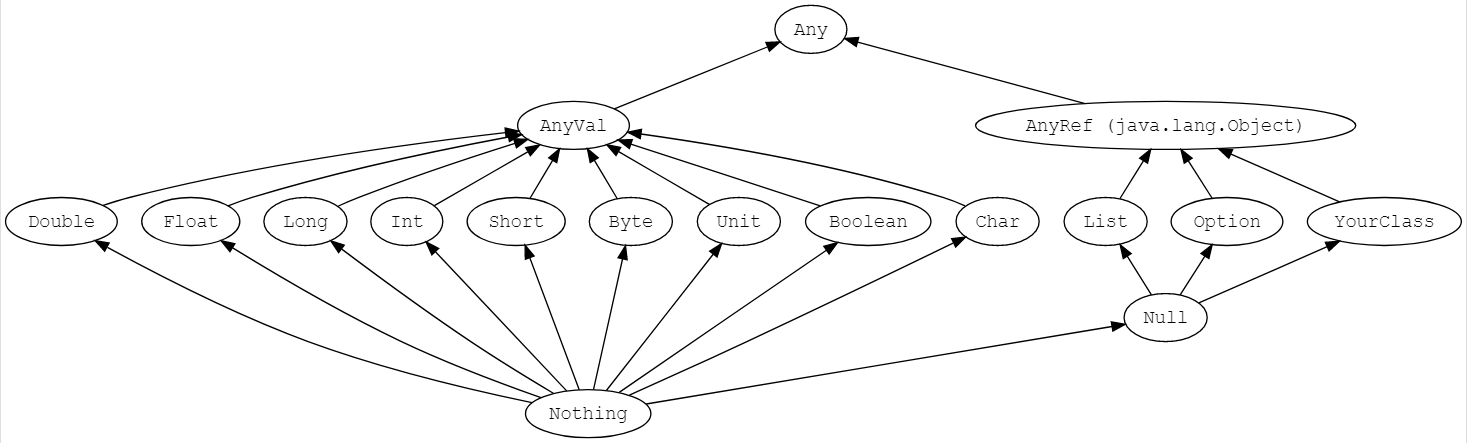


Do you know this, Look at the Return type. How they are changes AnyVal, Any, Int, Option[Int].
Try to relate with above diagram.

In [16]:
 def comp(i: Int) = if(i > 7) i

comp: (i: Int)AnyVal


In [17]:
 def comp(i: Int) = if(i > 7) i else "as"

comp: (i: Int)Any


In [18]:
 def comp(i: Int) = if(i > 7) i else i+1

comp: (i: Int)Int


In [19]:
 def comp(i: Int) = if(i > 7) Some(i) else i+1

comp: (i: Int)Any


In [20]:
 def comp(i: Int) = if(i > 7) Some(i) else None

comp: (i: Int)Option[Int]


Option has 2 subclasses- Some and None

In [22]:
 val j : Option[Int] = None

j: Option[Int] = None


In [23]:
 val j : Option[Int] = Some(7)

j: Option[Int] = Some(7)


shows all colle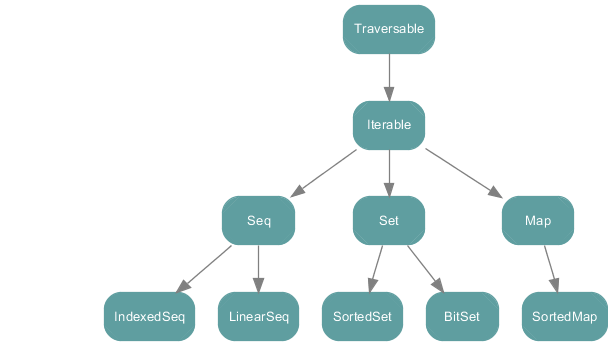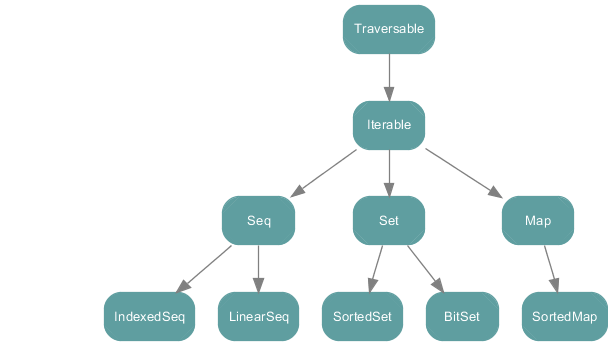ctions in packagescala.collection

shows all collections in packagescala.collection.immutable

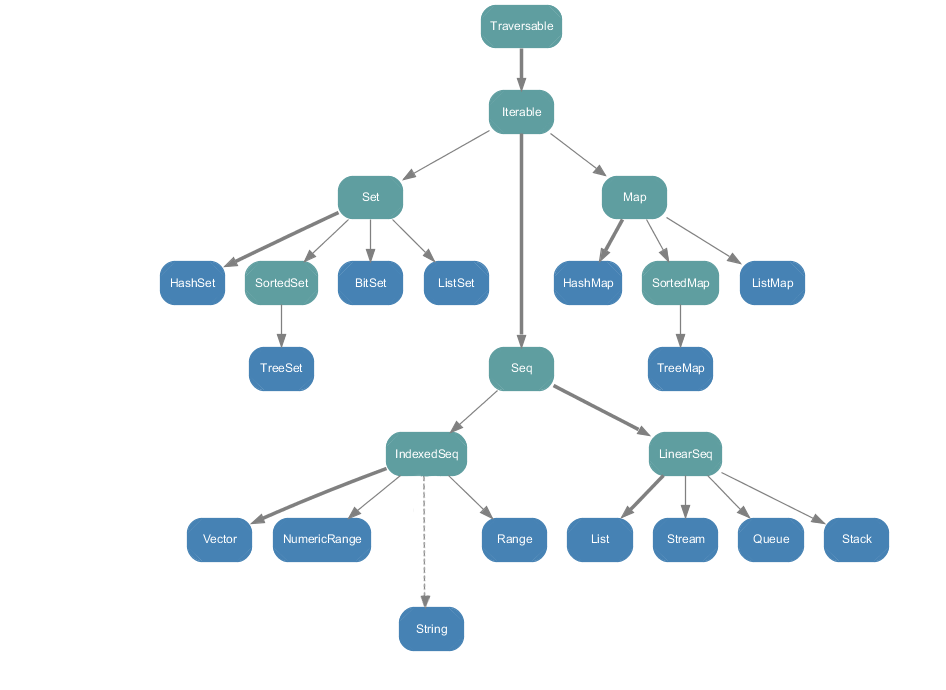

shows all collections in package scala.collection.mutable

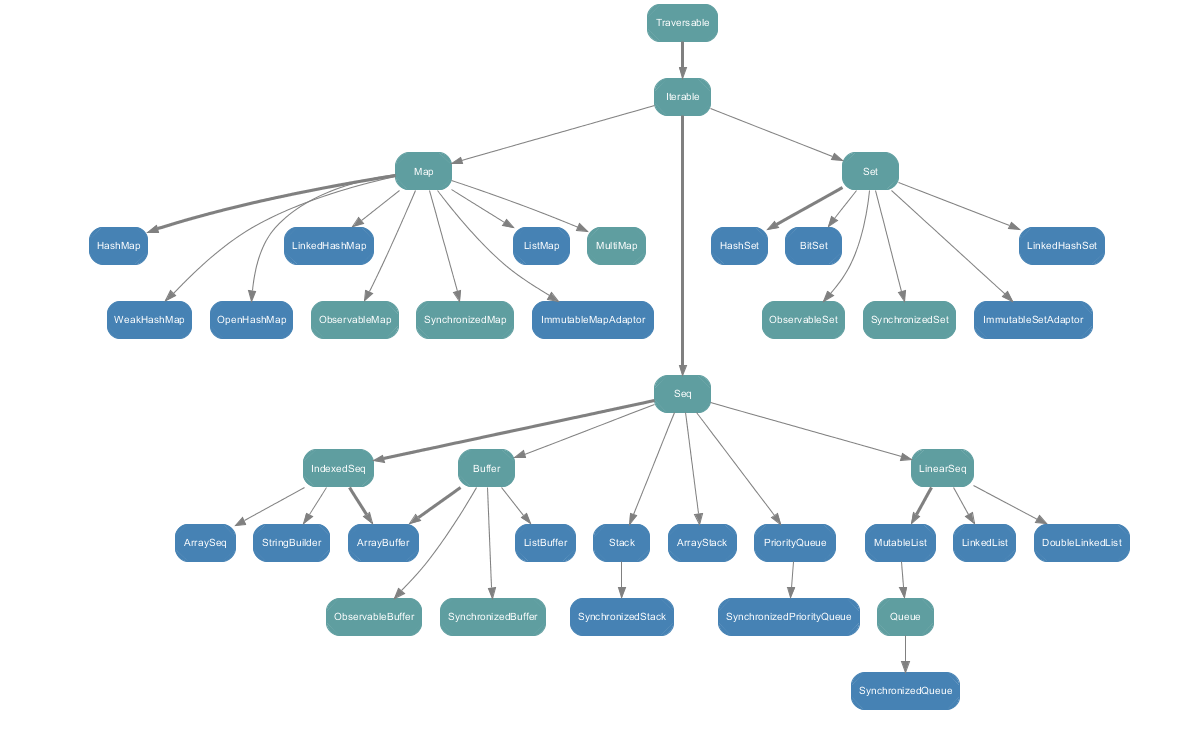

In [26]:
 object i  {
      def ~~(j: Int) = 2*j
 }

defined object i


In [27]:
 i ~~ 3

res1: Int = 6


In [29]:
 object i  {
     
     def ~:(j: Int) = 2*j 
 }

defined object i


In [30]:
 i ~: 3

<console>: 26: error: value ~: is not a member of Int

In [31]:
 3 ~: i

res3: Int = 6


In [32]:
 i.~:(3)


res4: Int = 6


Use lift instead of ()

In [34]:
 val l = List(8,7)

l: List[Int] = List(8, 7)


In [35]:
 l.lift(1)

res6: Option[Int] = Some(7)


In [36]:
 l.lift(6)

res7: Option[Int] = None


In [37]:
 l.lift(6).getOrElse(10)

res8: Int = 10


## Creating a DataFrame

First approach of a creating a DataFrame— Creating DataFrame using Tuple and .toDF() function

The first approach for creating a data frame in Spark using Scala syntax is to use the spark.implicits._.

In this approach, each row of the data frame corresponds to a tuple in which we bring the name of the columns in the .toDF() function. Let us create a DataFrame with a few rows using the following code snippet:

In [1]:
import spark.implicits._
  
val data = Seq(
    ("Stock", "Plus500", 0.5938, "Amazon", "01/11/2021", 3368.000, 4000.0),
 ("Stock", "Plus500", 0.6, "Facebook", "01/11/2021", 160.0, 200.0),
 ("Stock", "Plus500", 0.68, "Amazon", "01/11/2021", 160.0, 200.0),
 ("Stock", "eToro", 1.5, "Facebook", "12/11/2021", 180.0, 250.0),
 ("Stock", "Plus500", 0.065, "LinkedIn", "12/11/2021", 80.0, 140.0),
 ("Stock", "eToro", 1.3, "Pfeizer", "01/12/2021", 34.0, 85.5),
 ("Stock", "Plus500", 0.01, "Bitcoin", "01/11/2021", 45000.0, 48000.0),
 ("Stock", "Plus500", 0.08, "Sand", "29/11/2021", 5.4, 8.9)
    )

val firstApproachDF = data.toDF("Asset", "Platform", "Unit", "Trade Name", "Buy Date", "Buy Price", "Sell Price")

firstApproachDF.show()

firstApproachDF.printSchema 

Intitializing Scala interpreter ...

Spark Web UI available at http://host.docker.internal:4040
SparkContext available as 'sc' (version = 3.3.0, master = local[*], app id = local-1677465143750)
SparkSession available as 'spark'


+-----+--------+------+----------+----------+---------+----------+
|Asset|Platform|  Unit|Trade Name|  Buy Date|Buy Price|Sell Price|
+-----+--------+------+----------+----------+---------+----------+
|Stock| Plus500|0.5938|    Amazon|01/11/2021|   3368.0|    4000.0|
|Stock| Plus500|   0.6|  Facebook|01/11/2021|    160.0|     200.0|
|Stock| Plus500|  0.68|    Amazon|01/11/2021|    160.0|     200.0|
|Stock|   eToro|   1.5|  Facebook|12/11/2021|    180.0|     250.0|
|Stock| Plus500| 0.065|  LinkedIn|12/11/2021|     80.0|     140.0|
|Stock|   eToro|   1.3|   Pfeizer|01/12/2021|     34.0|      85.5|
|Stock| Plus500|  0.01|   Bitcoin|01/11/2021|  45000.0|   48000.0|
|Stock| Plus500|  0.08|      Sand|29/11/2021|      5.4|       8.9|
+-----+--------+------+----------+----------+---------+----------+

root
 |-- Asset: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Unit: double (nullable = false)
 |-- Trade Name: string (nullable = true)
 |-- Buy Date: string (nullable = 

import spark.implicits._
data: Seq[(String, String, Double, String, String, Double, Double)] = List((Stock,Plus500,0.5938,Amazon,01/11/2021,3368.0,4000.0), (Stock,Plus500,0.6,Facebook,01/11/2021,160.0,200.0), (Stock,Plus500,0.68,Amazon,01/11/2021,160.0,200.0), (Stock,eToro,1.5,Facebook,12/11/2021,180.0,250.0), (Stock,Plus500,0.065,LinkedIn,12/11/2021,80.0,140.0), (Stock,eToro,1.3,Pfeizer,01/12/2021,34.0,85.5), (Stock,Plus500,0.01,Bitcoin,01/11/2021,45000.0,48000.0), (Stock,Plus500,0.08,Sand,29/11/2021,5.4,8.9))
firstApproachDF: org.apache.spark.sql.DataFrame = [Asset: string, Platform: string ... 5 more fields]


Second approach of creating dataframe — Using createDataFrame() function
In the second approach, we use spark.createDataFrame() to create a DataFrame. The data still contains the sequence of tuples in Scala like the following:

In [2]:
val data = Seq(
    ("Stock", "Plus500", 0.5938, "Amazon", "01/11/2021", 3368.000, 4000.0),
 ("Stock", "Plus500", 0.6, "Facebook", "01/11/2021", 160.0, 200.0),
 ("Stock", "Plus500", 0.68, "Amazon", "01/11/2021", 160.0, 200.0),
 ("Stock", "eToro", 1.5, "Facebook", "12/11/2021", 180.0, 250.0),
 ("Stock", "Plus500", 0.065, "LinkedIn", "12/11/2021", 80.0, 140.0),
 ("Stock", "eToro", 1.3, "Pfeizer", "01/12/2021", 34.0, 85.5),
 ("Stock", "Plus500", 0.01, "Bitcoin", "01/11/2021", 45000.0, 48000.0),
 ("Stock", "Plus500", 0.08, "Sand", "29/11/2021", 5.4, 8.9)
    )
    
 val secondApproachDF =  spark.createDataFrame(data)
   
 
 secondApproachDF.show()
 secondApproachDF.printSchema

+-----+-------+------+--------+----------+-------+-------+
|   _1|     _2|    _3|      _4|        _5|     _6|     _7|
+-----+-------+------+--------+----------+-------+-------+
|Stock|Plus500|0.5938|  Amazon|01/11/2021| 3368.0| 4000.0|
|Stock|Plus500|   0.6|Facebook|01/11/2021|  160.0|  200.0|
|Stock|Plus500|  0.68|  Amazon|01/11/2021|  160.0|  200.0|
|Stock|  eToro|   1.5|Facebook|12/11/2021|  180.0|  250.0|
|Stock|Plus500| 0.065|LinkedIn|12/11/2021|   80.0|  140.0|
|Stock|  eToro|   1.3| Pfeizer|01/12/2021|   34.0|   85.5|
|Stock|Plus500|  0.01| Bitcoin|01/11/2021|45000.0|48000.0|
|Stock|Plus500|  0.08|    Sand|29/11/2021|    5.4|    8.9|
+-----+-------+------+--------+----------+-------+-------+

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: double (nullable = false)
 |-- _4: string (nullable = true)
 |-- _5: string (nullable = true)
 |-- _6: double (nullable = false)
 |-- _7: double (nullable = false)



data: Seq[(String, String, Double, String, String, Double, Double)] = List((Stock,Plus500,0.5938,Amazon,01/11/2021,3368.0,4000.0), (Stock,Plus500,0.6,Facebook,01/11/2021,160.0,200.0), (Stock,Plus500,0.68,Amazon,01/11/2021,160.0,200.0), (Stock,eToro,1.5,Facebook,12/11/2021,180.0,250.0), (Stock,Plus500,0.065,LinkedIn,12/11/2021,80.0,140.0), (Stock,eToro,1.3,Pfeizer,01/12/2021,34.0,85.5), (Stock,Plus500,0.01,Bitcoin,01/11/2021,45000.0,48000.0), (Stock,Plus500,0.08,Sand,29/11/2021,5.4,8.9))
secondApproachDF: org.apache.spark.sql.DataFrame = [_1: string, _2: string ... 5 more fields]


Schema and columns of a DataFrame
It is always possible to use the following methods to see the schema and columns of a DataFrame in Spark. Let us consider the firstAppachDF defined in previous sub section as follows:

In [3]:
//Schema of DataFrame
firstApproachDF.schema


res2: org.apache.spark.sql.types.StructType = StructType(StructField(Asset,StringType,true),StructField(Platform,StringType,true),StructField(Unit,DoubleType,false),StructField(Trade Name,StringType,true),StructField(Buy Date,StringType,true),StructField(Buy Price,DoubleType,false),StructField(Sell Price,DoubleType,false))


In [5]:
//Printing schema of the DataFrame
firstApproachDF.printSchema


root
 |-- Asset: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Unit: double (nullable = false)
 |-- Trade Name: string (nullable = true)
 |-- Buy Date: string (nullable = true)
 |-- Buy Price: double (nullable = false)
 |-- Sell Price: double (nullable = false)



In [6]:
//Columns of a DataFrame
firstApproachDF.columns


res5: Array[String] = Array(Asset, Platform, Unit, Trade Name, Buy Date, Buy Price, Sell Price)


In [7]:
//A single column
firstApproachDF.col("Asset")


res6: org.apache.spark.sql.Column = Asset


Iterating over columns of a DataFrame using Map function and appending values
Sometimes, it is required to go through every column of a DataFrame and append a suffix. It is possible to achieve that using a map() function like below:

In [8]:
firstApproachDF.columns.map(col => col + "_suffix")


res7: Array[String] = Array(Asset_suffix, Platform_suffix, Unit_suffix, Trade Name_suffix, Buy Date_suffix, Buy Price_suffix, Sell Price_suffix)


Various approaches for selecting columns of a DataFrame
There are various ways to select columns of a DataFrame. Selecting the columns of a DataFrame is important due to two aspects:

You might see various approaches in code so it is better to see these formats.
You may need to add some sort of dynamics to your code in order to expand a DataFrame.

In [11]:
//Approach 1. using select and column names
firstApproachDF.select("Asset","Platform").show(5)


+-----+--------+
|Asset|Platform|
+-----+--------+
|Stock| Plus500|
|Stock| Plus500|
|Stock| Plus500|
|Stock|   eToro|
|Stock| Plus500|
+-----+--------+
only showing top 5 rows



In [12]:
//Approach 2 and 3. using select with $ sign or col( )

firstApproachDF.select($"Asset", $"Platform", $"Unit", col("Trade Name"), 
col("Buy Date")).show(5)

+-----+--------+------+----------+----------+
|Asset|Platform|  Unit|Trade Name|  Buy Date|
+-----+--------+------+----------+----------+
|Stock| Plus500|0.5938|    Amazon|01/11/2021|
|Stock| Plus500|   0.6|  Facebook|01/11/2021|
|Stock| Plus500|  0.68|    Amazon|01/11/2021|
|Stock|   eToro|   1.5|  Facebook|12/11/2021|
|Stock| Plus500| 0.065|  LinkedIn|12/11/2021|
+-----+--------+------+----------+----------+
only showing top 5 rows



In [13]:
// Approach 4. using expressions and spark implicits
firstApproachDF.select(expr("Asset"), $"Trade Name").show(5)


+-----+----------+
|Asset|Trade Name|
+-----+----------+
|Stock|    Amazon|
|Stock|  Facebook|
|Stock|    Amazon|
|Stock|  Facebook|
|Stock|  LinkedIn|
+-----+----------+
only showing top 5 rows



In [14]:
// It is also possible to apply calculations using expr. Let us consider the following:

firstApproachDF.select($"Unit",expr("Unit * 2").as("Unit Multiplied by 2"), 
$"Trade Name").show(5)


+------+--------------------+----------+
|  Unit|Unit Multiplied by 2|Trade Name|
+------+--------------------+----------+
|0.5938|              1.1876|    Amazon|
|   0.6|                 1.2|  Facebook|
|  0.68|                1.36|    Amazon|
|   1.5|                 3.0|  Facebook|
| 0.065|                0.13|  LinkedIn|
+------+--------------------+----------+
only showing top 5 rows



Approach 5. using selectExpr
Let us consider the following example of calculating profit from the difference of Buy Price and Sell Price using selectExpr function. Please note that we should use `` for columns with spaces:

In [16]:
firstApproachDF.selectExpr("Asset", "Platform", """`Trade Name`""", """`Buy Date`""", 
"Unit", """ `Sell Price` - `Buy Price` as profit""" ).show(5)

+-----+--------+----------+----------+------+------+
|Asset|Platform|Trade Name|  Buy Date|  Unit|profit|
+-----+--------+----------+----------+------+------+
|Stock| Plus500|    Amazon|01/11/2021|0.5938| 632.0|
|Stock| Plus500|  Facebook|01/11/2021|   0.6|  40.0|
|Stock| Plus500|    Amazon|01/11/2021|  0.68|  40.0|
|Stock|   eToro|  Facebook|12/11/2021|   1.5|  70.0|
|Stock| Plus500|  LinkedIn|12/11/2021| 0.065|  60.0|
+-----+--------+----------+----------+------+------+
only showing top 5 rows



Renaming a column and creating a new column
It is possible to rename the column name using .withColumnRenamed() function, so let us have a look at it by adding underscore (_) to the column names with spaces:

In [17]:
val renamedColumns = firstApproachDF.withColumnRenamed("Trade Name","Trade_Name")
.withColumnRenamed("Buy Price","Buy_Price")
.withColumnRenamed("Sell Price","Sell_Price")

renamedColumns.show()

+-----+--------+------+----------+----------+---------+----------+
|Asset|Platform|  Unit|Trade_Name|  Buy Date|Buy_Price|Sell_Price|
+-----+--------+------+----------+----------+---------+----------+
|Stock| Plus500|0.5938|    Amazon|01/11/2021|   3368.0|    4000.0|
|Stock| Plus500|   0.6|  Facebook|01/11/2021|    160.0|     200.0|
|Stock| Plus500|  0.68|    Amazon|01/11/2021|    160.0|     200.0|
|Stock|   eToro|   1.5|  Facebook|12/11/2021|    180.0|     250.0|
|Stock| Plus500| 0.065|  LinkedIn|12/11/2021|     80.0|     140.0|
|Stock|   eToro|   1.3|   Pfeizer|01/12/2021|     34.0|      85.5|
|Stock| Plus500|  0.01|   Bitcoin|01/11/2021|  45000.0|   48000.0|
|Stock| Plus500|  0.08|      Sand|29/11/2021|      5.4|       8.9|
+-----+--------+------+----------+----------+---------+----------+



renamedColumns: org.apache.spark.sql.DataFrame = [Asset: string, Platform: string ... 5 more fields]


 creating a new column, we can use the function .withColumn() in which we can specify the column name as well. In the following, we create two columns named “Profit” and “Profit Percentage”

In [19]:
val profitDF = firstApproachDF.withColumn("Profit", col("Sell Price") - col("Buy Price"))
.withColumn("Profit Percentage", col("Sell Price") / col("Buy Price"))

profitDF.show()

+-----+--------+------+----------+----------+---------+----------+------+------------------+
|Asset|Platform|  Unit|Trade Name|  Buy Date|Buy Price|Sell Price|Profit| Profit Percentage|
+-----+--------+------+----------+----------+---------+----------+------+------------------+
|Stock| Plus500|0.5938|    Amazon|01/11/2021|   3368.0|    4000.0| 632.0| 1.187648456057007|
|Stock| Plus500|   0.6|  Facebook|01/11/2021|    160.0|     200.0|  40.0|              1.25|
|Stock| Plus500|  0.68|    Amazon|01/11/2021|    160.0|     200.0|  40.0|              1.25|
|Stock|   eToro|   1.5|  Facebook|12/11/2021|    180.0|     250.0|  70.0|1.3888888888888888|
|Stock| Plus500| 0.065|  LinkedIn|12/11/2021|     80.0|     140.0|  60.0|              1.75|
|Stock|   eToro|   1.3|   Pfeizer|01/12/2021|     34.0|      85.5|  51.5| 2.514705882352941|
|Stock| Plus500|  0.01|   Bitcoin|01/11/2021|  45000.0|   48000.0|3000.0|1.0666666666666667|
|Stock| Plus500|  0.08|      Sand|29/11/2021|      5.4|       8.9|   3

profitDF: org.apache.spark.sql.DataFrame = [Asset: string, Platform: string ... 7 more fields]


Filtering rows in Spark
Oftentimes, it is required to filter rows of DataFrame based on certain criteria. For doing so, it is possible to use filter function in which in the following, I review some example of filter functions:

In [21]:
// Example 1
firstApproachDF.filter(col("Platform") === "Plus500").show()

+-----+--------+------+----------+----------+---------+----------+
|Asset|Platform|  Unit|Trade Name|  Buy Date|Buy Price|Sell Price|
+-----+--------+------+----------+----------+---------+----------+
|Stock| Plus500|0.5938|    Amazon|01/11/2021|   3368.0|    4000.0|
|Stock| Plus500|   0.6|  Facebook|01/11/2021|    160.0|     200.0|
|Stock| Plus500|  0.68|    Amazon|01/11/2021|    160.0|     200.0|
|Stock| Plus500| 0.065|  LinkedIn|12/11/2021|     80.0|     140.0|
|Stock| Plus500|  0.01|   Bitcoin|01/11/2021|  45000.0|   48000.0|
|Stock| Plus500|  0.08|      Sand|29/11/2021|      5.4|       8.9|
+-----+--------+------+----------+----------+---------+----------+



In [27]:
//Example 2. using OR operator (||)
val orExampleDF = firstApproachDF.filter(col("Trade Name") === "Amazon" || col("Trade Name") === "Facebook")

orExampleDF.show()

+-----+--------+------+----------+----------+---------+----------+
|Asset|Platform|  Unit|Trade Name|  Buy Date|Buy Price|Sell Price|
+-----+--------+------+----------+----------+---------+----------+
|Stock| Plus500|0.5938|    Amazon|01/11/2021|   3368.0|    4000.0|
|Stock| Plus500|   0.6|  Facebook|01/11/2021|    160.0|     200.0|
|Stock| Plus500|  0.68|    Amazon|01/11/2021|    160.0|     200.0|
|Stock|   eToro|   1.5|  Facebook|12/11/2021|    180.0|     250.0|
+-----+--------+------+----------+----------+---------+----------+



orExampleDF: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [Asset: string, Platform: string ... 5 more fields]


In [30]:
// Example 3. using AND operator (&&)
val andExampleDF = firstApproachDF.filter(col("Trade Name") === "Facebook" && col("Platform") === "Plus500")

andExampleDF.show()


+-----+--------+----+----------+----------+---------+----------+
|Asset|Platform|Unit|Trade Name|  Buy Date|Buy Price|Sell Price|
+-----+--------+----+----------+----------+---------+----------+
|Stock| Plus500| 0.6|  Facebook|01/11/2021|    160.0|     200.0|
+-----+--------+----+----------+----------+---------+----------+



andExampleDF: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [Asset: string, Platform: string ... 5 more fields]


In [33]:
// Example 4. Not equal and greater than (>)
//Let us select all trades with more than 0.5 unit in which the trade name is not Amazon:

val demoDF = firstApproachDF.filter(col("Unit") >= 0.5 && col("Trade Name") =!= "Amazon")

demoDF.show()

+-----+--------+----+----------+----------+---------+----------+
|Asset|Platform|Unit|Trade Name|  Buy Date|Buy Price|Sell Price|
+-----+--------+----+----------+----------+---------+----------+
|Stock| Plus500| 0.6|  Facebook|01/11/2021|    160.0|     200.0|
|Stock|   eToro| 1.5|  Facebook|12/11/2021|    180.0|     250.0|
|Stock|   eToro| 1.3|   Pfeizer|01/12/2021|     34.0|      85.5|
+-----+--------+----+----------+----------+---------+----------+



demoDF: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [Asset: string, Platform: string ... 5 more fields]


Spark grouping and aggregation functions
It is very much common to calculate several statistics over groups of data. Spark has a very rich support for such calculations. Considering the DF from previous sections, let us calculate several statistics:

Example of count()
Here, we group by per Asset and Platform and count the number of trades.

In [35]:
// Calculating number of trades per platform

val numberOfTradesPerPlatform = firstApproachDF.groupBy("Asset", "Platform")
.agg(count("*").as("NumberOfTradesPerAssetPPlatForm"))

numberOfTradesPerPlatform.show()

+-----+--------+-------------------------------+
|Asset|Platform|NumberOfTradesPerAssetPPlatForm|
+-----+--------+-------------------------------+
|Stock| Plus500|                              6|
|Stock|   eToro|                              2|
+-----+--------+-------------------------------+



numberOfTradesPerPlatform: org.apache.spark.sql.DataFrame = [Asset: string, Platform: string ... 1 more field]


Example of countDistinct()
Here, we group by per Asset and Platform and count the distinct values of traded items: